In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd

import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
MARKER = '.'
MARKERSIZE = 4
LINESTYLE ='-'
FONTSIZE = 12
FIGSIZE = (12, 8 )

kwargs = {'marker': MARKER, 'linestyle': 'solid', 'linewidth': 1, 'markersize': MARKERSIZE}

from audiovocana.conf import *
from audiovocana.dataset import get_dataset

In [2]:
csv_path = '/home/utilisateur/Desktop/palomars/data/dev/dataset.csv'
cache_folder = '/home/utilisateur/Desktop/palomars/cache/dev_dataset'
xlsx_folder = "/home/utilisateur/Desktop/palomars/data/dev"
audio_folder = "/home/utilisateur/Desktop/palomars/data/dev"

dataset = get_dataset(
    csv_path=csv_path,
    cache_folder=cache_folder,
    shuffle=True,
    recompute=False
)

Reading csv from /home/utilisateur/Desktop/palomars/data/dev/dataset.csv.
Found 377 events from 3 different experiments and 9 different recordings


123it [00:00, 446.59it/s]


In [5]:
STFTPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length':HOPLENGTH,
    'x_axis': 'time',
    # for y axis settings
    'fmax': FMAX,
    'y_axis': 'linear',
    # color
    # cmap= 'PuBu_r', #'gray', 'PuBu_r', 'RdBu',
}

MFCCPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length': HOPLENGTH,
    'x_axis': 'time',
    # for y axis settings
    'y_axis': 'nose',
    'y_coords': np.linspace(1, 38, 38)
}



MELPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length': int(NFFT/2),
    'x_axis': 'time',
    # for y axis settings
    'fmax': FMAX,
    'y_axis': 'mel',
    # color
    # cmap= 'gray', #'PuBu_r', 'RdBu',
}

sample duration = 0.0318 seconds.
audio shape = (7950,)
Spectrogram shape = (4097, 16)


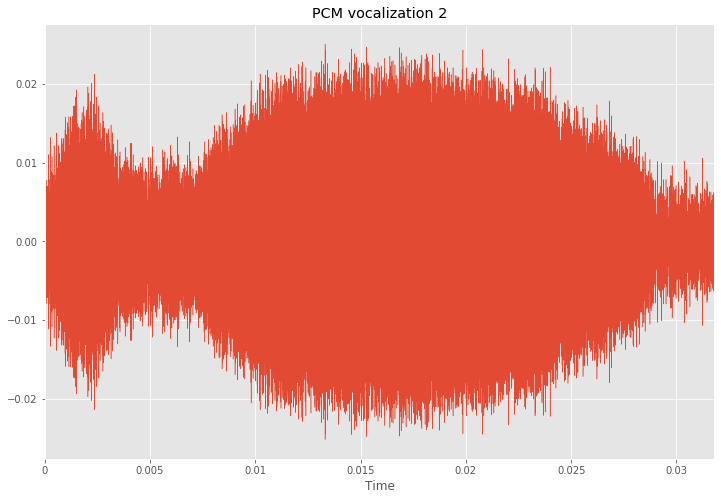

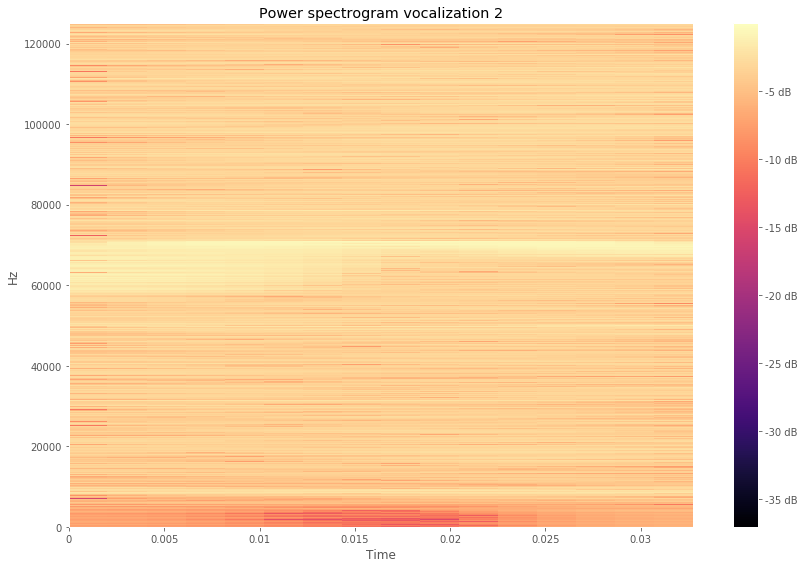

Melspectrogram shape = (128, 16)


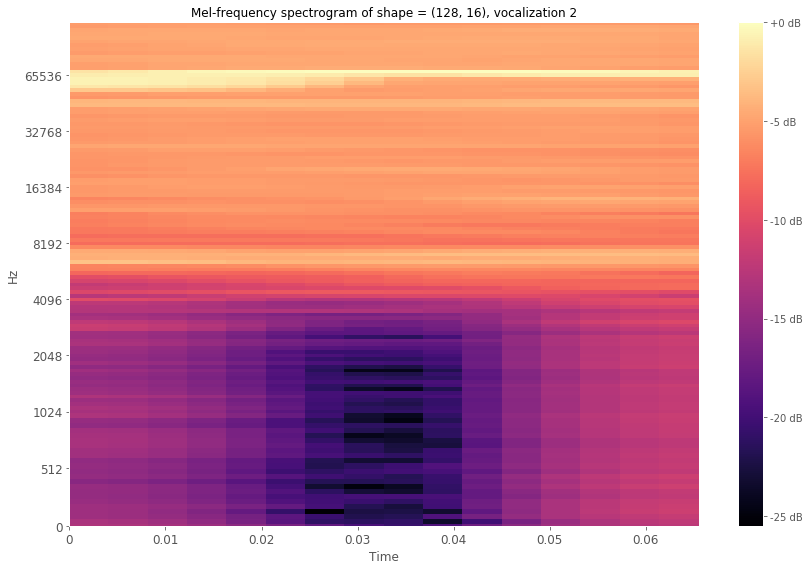

sample duration = 0.0512 seconds.
audio shape = (12800,)
Spectrogram shape = (4097, 26)


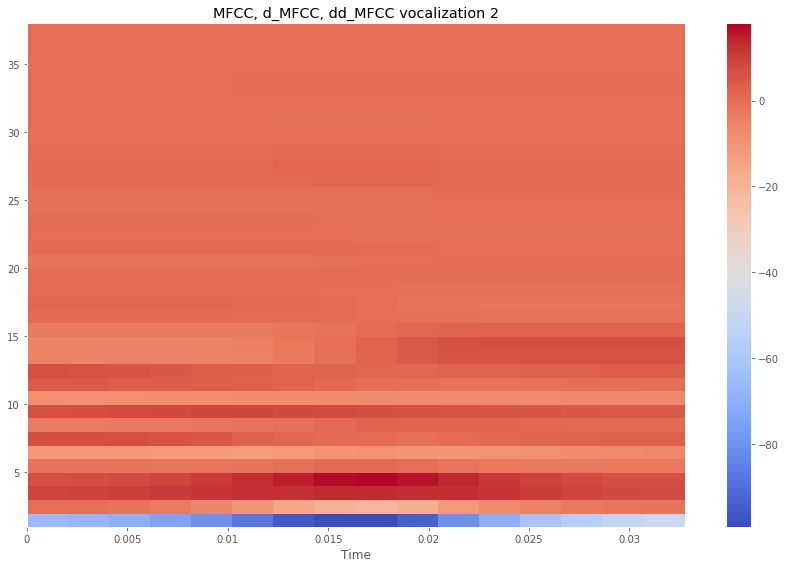

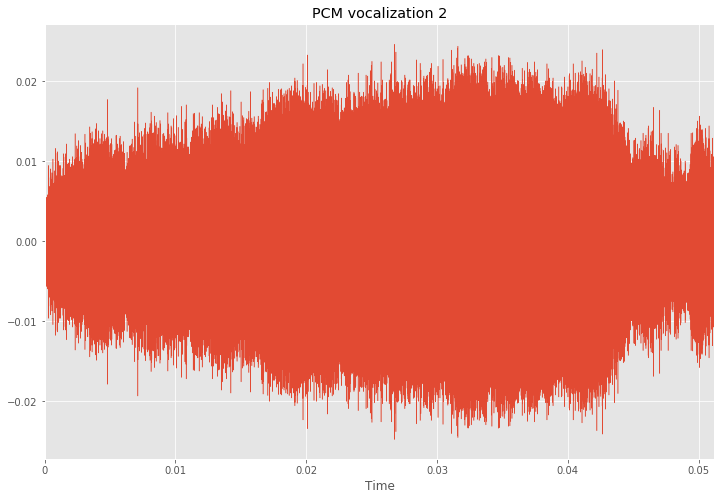

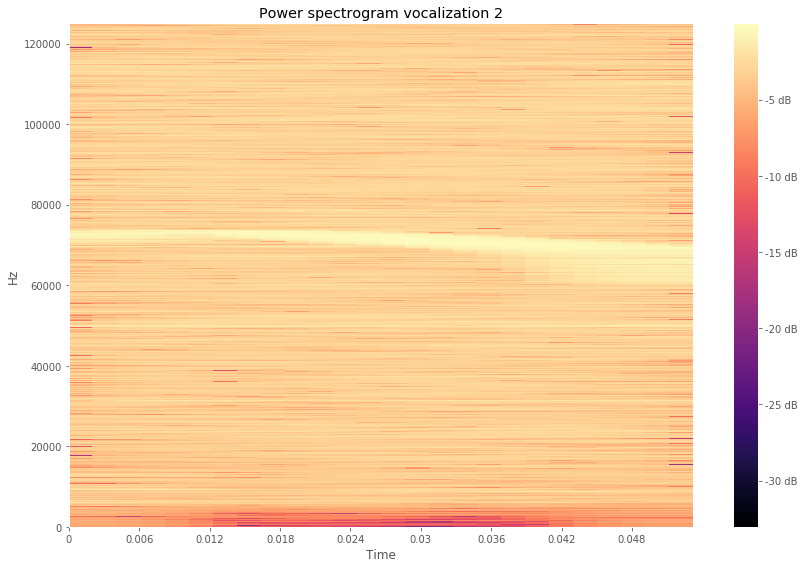

Melspectrogram shape = (128, 26)


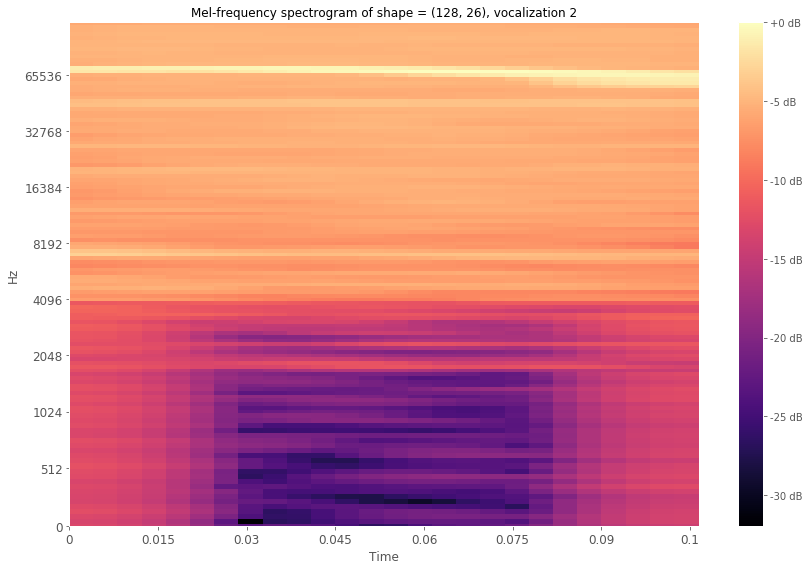

sample duration = 0.0353 seconds.
audio shape = (8825,)
Spectrogram shape = (4097, 18)


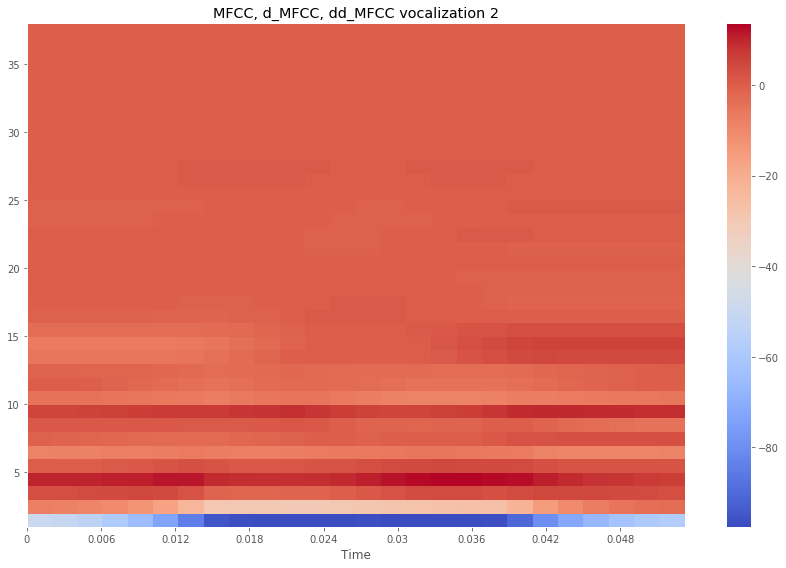

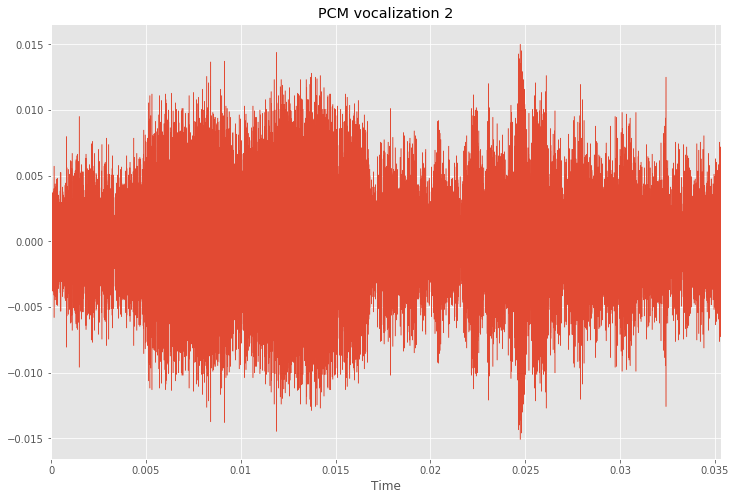

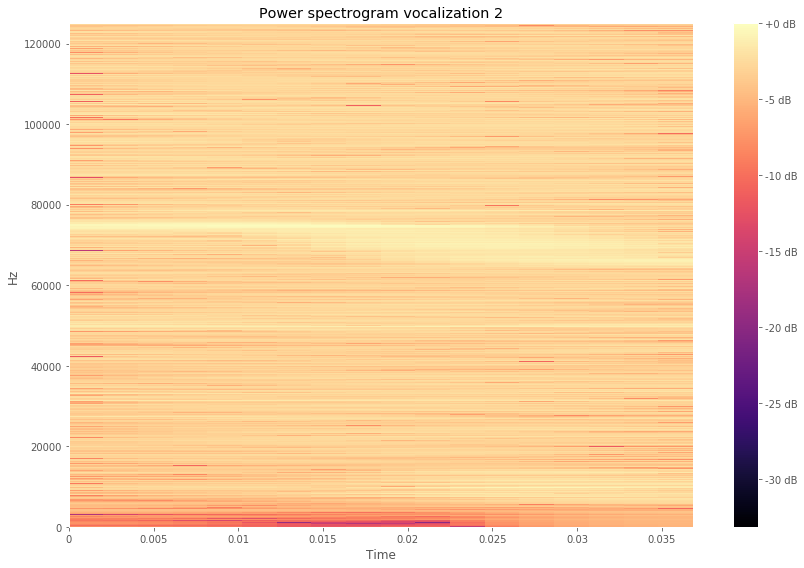

Melspectrogram shape = (128, 18)


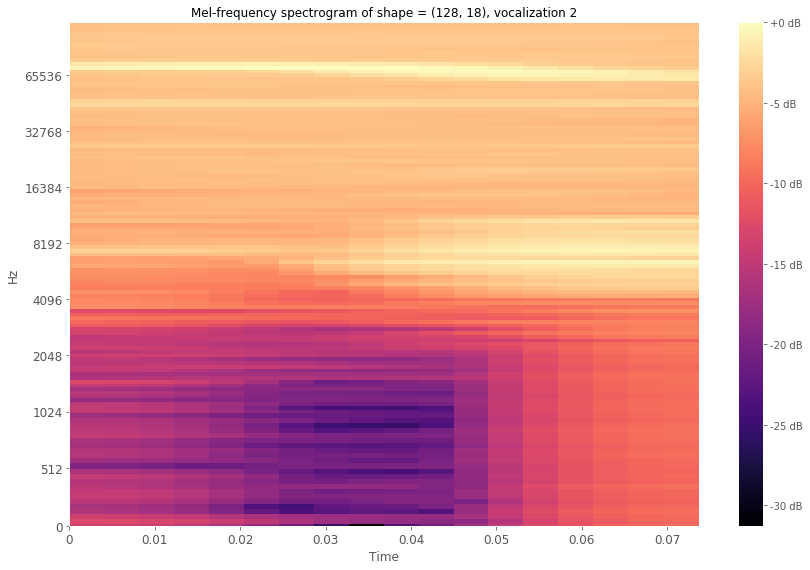

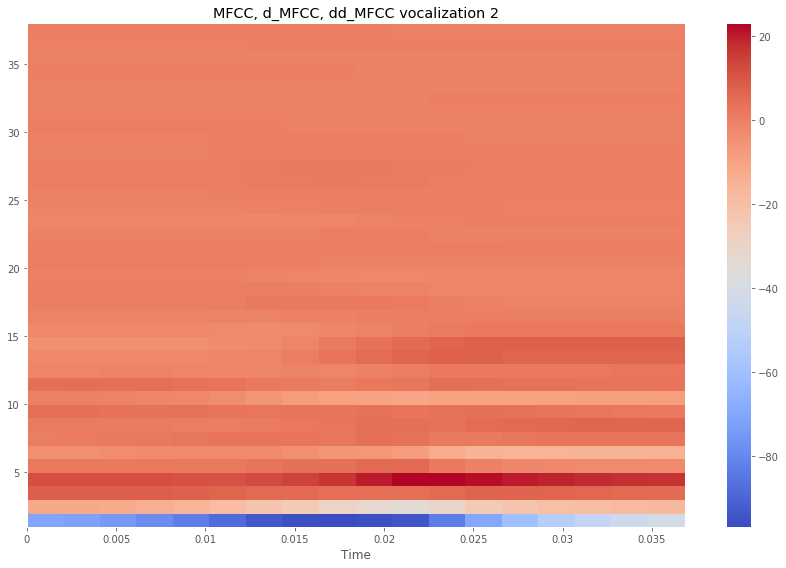

In [34]:
for sample in dataset.take(3):

    VOC = sample['vocalization']
    STFT = sample['stft']
    MEL = sample['mel']
    MFCC =sample['mfcc']
    waveform = sample['audio'].numpy()

    # Load audio
    plt.figure(figsize=FIGSIZE)
    librosa.display.waveplot(waveform, sr=SR)
    plt.title(f'PCM vocalization {voc}')

    print(f"sample duration = {waveform.shape[0]/SR} seconds.")
    print(f'audio shape = {waveform.shape}')

    export_filename = '/tmp/to_erase_audio.wav'
    librosa.output.write_wav(export_filename, waveform, SR)
    ipd.Audio(export_filename)

    
    # Show spectrogram    
    print(f'Spectrogram shape = {STFT.shape}')
    plt.figure(figsize=FIGSIZE)                         
    librosa.display.specshow(
        librosa.power_to_db(STFT, ref=np.max),
        **STFTPLOTPARAMS
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Power spectrogram vocalization {voc}")
    plt.tight_layout()

    plt.show()   
    
    
    # Show melspectrogram
    
    print(f'Melspectrogram shape = {MEL.shape}')

    plt.figure(figsize=FIGSIZE)
    ax = librosa.display.specshow(
        librosa.power_to_db(MEL, ref=np.max),
        **MELPLOTPARAMS
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-frequency spectrogram of shape = {MEL.shape}, vocalization {voc}')
    plt.tight_layout()

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

    plt.show()
    
    
    # show MFCC
    
    
    nono =  plt.figure(figsize=FIGSIZE)
    librosa.display.specshow(
        MFCC.numpy(),
        **MFCCPLOTPARAMS
    )
    plt.colorbar()
    plt.title(f'MFCC, d_MFCC, dd_MFCC vocalization {voc}')
    plt.tight_layout()

**Compute MFFC**

/home/utilisateur/anaconda3/envs/palomars/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


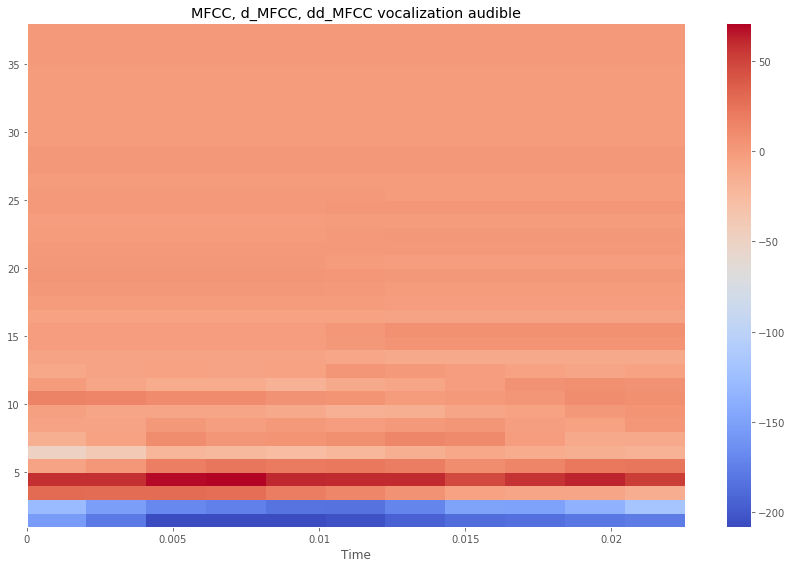